In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# 시드 설정
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [5]:
def plot_graph(X, Y):
    fig = plt.figure(figsize=(8,6))
    
    plt.plot(X, Y)

In [6]:
x_0 = tf.random.normal([20], 3, 1)
y_0 = tf.zeros(20)
x_1 = tf.random.normal([20], 5.5, 1)
y_1 = tf.ones(20)

x = tf.concat([x_0, x_1], 0)
y = tf.concat([y_0, y_1], 0)

print(x.shape)
print(y.shape)
print(x)
print(y)

(40,)
(40,)
tf.Tensor(
[1.8987797 4.5457516 3.383644  2.1203423 1.7753278 2.018879  3.087808
 2.7967396 2.4418437 2.279456  2.3740077 2.284974  2.6516457 2.66353
 3.1825757 4.1085954 4.279659  2.9785242 2.6803112 3.3733256 5.903088
 4.411979  5.4369044 6.8365564 6.21176   5.0107136 4.735779  4.4627514
 4.248066  5.5212245 4.948624  3.7568302 5.164639  4.4573326 6.509138
 6.7362537 4.816311  6.173609  5.079377  4.4586973], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


2023-06-16 16:25:04.644889: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
def cross_entropy(x, y, w, b):
    y_pred = tf.sigmoid(x*w + b) #a
    return -tf.reduce_sum(y*tf.math.log(y_pred) + (1-y)*(tf.math.log(1-y_pred)))

def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    N = tf.shape(x)[0]
    for i in range(0, N):
        x_i = x[i]
        y_i = y[i]
        y_pred = tf.sigmoid(x_i*w + b)
        
        dL_df1 = -(y_i - y_pred) / (y_pred*(1 - y_pred))
        dL_df2 = y_pred * (1-y_pred)
        
        b_gradient += dL_df1 * dL_df2 * 1
        w_gradient += dL_df1 * dL_df2 * x_i
    return [w_gradient, b_gradient]

In [10]:
def apply_gradient(gradients, parameters, learning_rate):
    [w_g, b_g] = gradients
    [w, b] = parameters
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    return [w, b]

In [11]:
def run_opt (x, y, w, b, learning_rate):
    gradient = cal_gradient(x, y, w, b)
    return apply_gradient(gradient, [w, b], learning_rate)

In [14]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

learning_rate = 0.005
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new
    
    if step%display_step == 0:
        loss = cross_entropy(x, y, w, b)
        print("step:", step, ", loss:", loss.numpy(), ", w:", w.numpy(), ", b:" ,b.numpy)

step: 0 , loss: 20.841946 , w: [0.48673934] , b: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.2275169], dtype=float32)>>
step: 200 , loss: 12.989342 , w: [1.0218767] , b: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-3.8363504], dtype=float32)>>
step: 400 , loss: 10.74083 , w: [1.3691167] , b: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-5.2835445], dtype=float32)>>
step: 600 , loss: 9.677397 , w: [1.6091256] , b: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-6.2827034], dtype=float32)>>
step: 800 , loss: 9.059598 , w: [1.7920285] , b: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-7.045497], dtype=float32)>>
step: 1000 , loss: 8.656824 , w: [1.9394977] , b: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-7.

KeyboardInterrupt: 

In [21]:
def plot_graph(X, Y, X_hat, Y_hat):
    fig = plt.figure(figsize=(8,6))
    
    plt.plot(X,Y, marker="o")
    plt.plot(X_hat,Y_hat)

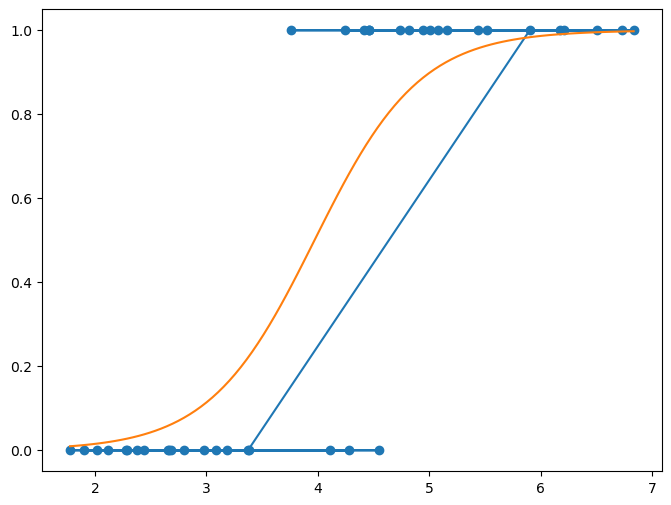

In [23]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, x_fl, tf.sigmoid(w*x_fl+b))

In [32]:
#dataset load
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32) # float32로 데이터 타입 변경(원래는 0~255 int였음)
num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2] #28*28 = 784

# -1은 원래 shape에서 다른 값으로 나눴을 때의 값을 넣어라! 라는 뜻 -> 원래 shape / 784의 값이 들어가겠죠
x_train, x_test = tf.reshape(x_train, [-1, num_features]), tf.reshape(x_test, [-1, num_features])
x_train, x_test = x_train/255., x_test/255.  # "."쓰는 이유는 float형태로 맞춰주려고

In [33]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [35]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10) # class 개수
    ]
)

In [39]:
model.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# 어떤 optimizer, 어떤 loss, 어떤 metric을 사용해서 학습할 것인지 넣어줌 !!!
result = model.fit(x_train, y_train, batch_size=128, epochs=40)

Epoch 1/40
469/469 [==============================] - 3s 6ms/step - loss: 1.2942 - accuracy: 0.6928
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.5049 - accuracy: 0.8695
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3873 - accuracy: 0.8935
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3418 - accuracy: 0.9030
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3143 - accuracy: 0.9098
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2945 - accuracy: 0.9155
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2781 - accuracy: 0.9194
Epoch 8/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2643 - accuracy: 0.9242
Epoch 9/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2522 - accuracy: 0.9279
Epoch 10/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2411 - accuracy: 0.9310

<function matplotlib.pyplot.show(close=None, block=None)>

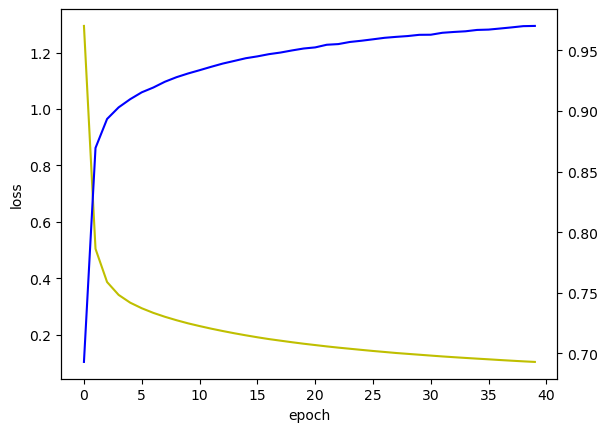

In [45]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(result.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(result.history['accuracy'], 'b', label='train acc')
plt.show

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9658
0.11529023200273514
0.9657999873161316
